In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


In [13]:
def moran(N, game, i=1, seed=0):
    
    population = [0 for _ in range(i)] + [1 for _ in range(N - i)]
    counts_a = [(population.count(0))]
    counts_b = [(population.count(1))]
    np.random.seed(seed)
    
    while len(set(population)) == 2:
        
        scores = []
        
        for l, player in enumerate(population):
            total = 0
            for j, opponent in enumerate(population):
                if l != j:
                    total += game[player, opponent]
            scores.append(total)
            #print(scores)

        total_score = sum(scores)
        probabilities = np.array(scores)/total_score
        reproduce_index = np.random.choice(range(N), p=probabilities)
        
        eliminate_index = np.random.randint(N)
        population[eliminate_index] = population[reproduce_index]
        
        counts_a.append((population.count(0)))
        counts_b.append((population.count(1)))
        
    generations = np.linspace(1, len(counts_a), len(counts_a))
    return (counts_a, counts_b, generations)

In [14]:
def fixation(N, game, i=None, repetitions=100):
    """
    Repeat the Moran process and calculate the fixation probability
    """
    fixation_count = 0
    for seed in range(repetitions):
        final_countsa, final_countsb, gens = moran(N=N, i=i, game=game, seed=seed)
        if final_countsa[-1] > 0:
            fixation_count += 1
    return  fixation_count / repetitions

In [15]:
def theoretic_fixation_(N, game, i):
    """
    Calculate x_i as given by the above formula
    """
    fs = np.zeros(N-1)
    gs = np.zeros(N-1)
    
    for j in range(1,N):
        fs[j-1] = ((game[0, 0] * (j - 1)) + (game[0, 1] * (N - j))) / (N - 1)
        gs[j-1] = ((game[1, 0] * j) + (game[1, 1] * (N - j - 1))) / (N - 1)
        
    
    gammas = gs / fs
    return ((1 + np.sum(np.cumprod(gammas[:i-1]))) / (1 + np.sum(np.cumprod(gammas))))

In [26]:
def figura(N, game, i):
    
    fig = plt.figure(figsize=(15,7))
    
    countsa, countsb, generations = moran(N=N, game=A, i = i, seed = 44)
     
    
    ax1 = fig.add_subplot(1,2,1) 
    ax1.plot(generations,countsa, color = "lightblue", label = "Especie A")
    ax1.plot(generations,countsb, color = "lightpink", label = "Especie B")
    ax1.set_xlabel("Generaciones", size = 8)
    ax1.set_ylabel("Conteos", size = 8)
    ax1.set_title("Conteos de las especies en cada generación", size = 10)
    ax1.grid()
    ax1.legend()
    
    probabilities = np.zeros(N)
    theoretic_probs= np.zeros(N)
    i_s = np.linspace(1, N, N)
    for i in range(1,N+1):
        probabilities[i-1] = fixation(N=N, game=A, i = i, repetitions=500)
        theoretic_probs[i-1] = theoretic_fixation_(N=N, game = A, i = i)
        
    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(i_s,probabilities, s = 40, color = "lightblue", label = "Simulación")
    ax2.plot(i_s,theoretic_probs, linestyle = "--", color = "lightpink", label = "Teoría")
    ax2.set_xlabel("i", size = 8)
    ax2.set_ylabel("Probabilidad de fijación", size = 8)
    ax2.set_title("Probabilidad de fijación según \n la cantidad inicial de \n especie A", size = 10)
    ax2.grid()
    ax2.legend()
    
    return(fig)

<IPython.core.display.Javascript object>


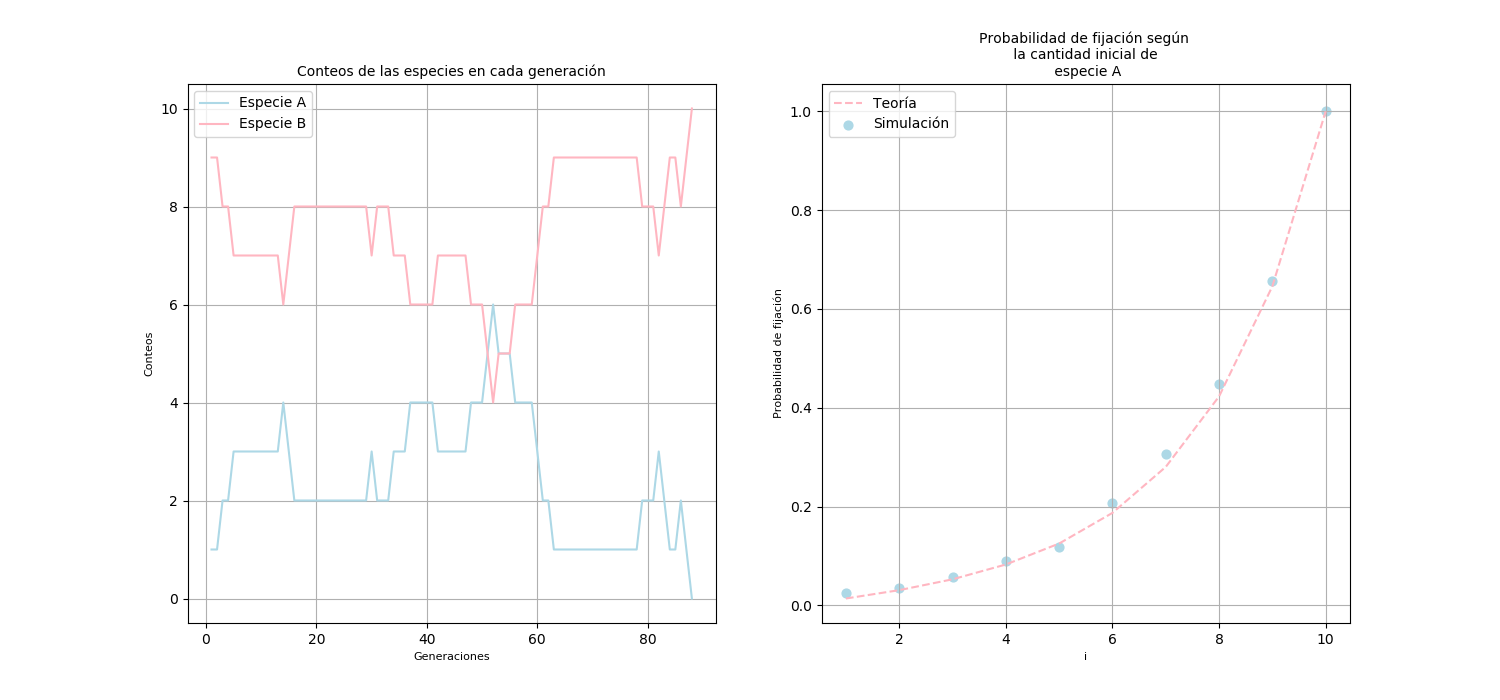

In [27]:
N = 10
A = np.array([[2,1],[3,1]])
figura_moran = figura(N=10, game=A, i=1)
